In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 200
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('data/Ames_Transaction.csv')
df.shape

(2557, 37)

In [3]:
df.head()

,GeoRefNo,ClassPr_S,ClassSc_S,MA_Zip1,PA-Strt,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,522105010,RESIDENTIAL,2-STORY 1946 & NEWER,50010.0,LEDGES,93300,0,279700,373000,HaydnLk,10015.0,Dwg&Lot,0,1,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2017.0,10.0,365400.0,WRDConv,Normal
1,522105010,RESIDENTIAL,2-STORY 1946 & NEWER,50010.0,LEDGES,93300,0,279700,373000,HaydnLk,10015.0,Dwg&Lot,0,1,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2016.0,5.0,75000.0,WRDConv,Normal
2,522110120,RESIDENTIAL,2-STORY 1946 & NEWER,50010.0,LEDGES,98100,0,294400,392500,HaydnLk,14904.0,Dwg&Lot,0,1,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2019.0,1.0,392500.0,WRDConv,Normal
3,522110120,RESIDENTIAL,2-STORY 1946 & NEWER,50010.0,LEDGES,98100,0,294400,392500,HaydnLk,14904.0,Dwg&Lot,0,1,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2018.0,1.0,75000.0,WRDConv,Normal
4,522150100,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,50010.0,AUDUBON,80000,0,57300,137300,HaydnLk,9189.0,Vac.Lot,0,1,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2018.0,7.0,80000.0,WRDConv,Normal


In [4]:
#df['BldAge'] = df['YrSold_YYYY']-df['YrBuilt']
#df['GrgAge'] = df['YrSold_YYYY']-df['GarYrBlt']

In [5]:
df.drop(['GeoRefNo', 'ClassPr_S', 'MA_Zip1', 'BldgNo_S', 'DwlgNo_S'], axis=1, inplace=True)

In [6]:
df.shape

(2557, 32)

In [7]:
df.head()

,ClassSc_S,PA-Strt,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,2-STORY 1946 & NEWER,LEDGES,93300,0,279700,373000,HaydnLk,10015.0,Dwg&Lot,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2017.0,10.0,365400.0,WRDConv,Normal
1,2-STORY 1946 & NEWER,LEDGES,93300,0,279700,373000,HaydnLk,10015.0,Dwg&Lot,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2016.0,5.0,75000.0,WRDConv,Normal
2,2-STORY 1946 & NEWER,LEDGES,98100,0,294400,392500,HaydnLk,14904.0,Dwg&Lot,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2019.0,1.0,392500.0,WRDConv,Normal
3,2-STORY 1946 & NEWER,LEDGES,98100,0,294400,392500,HaydnLk,14904.0,Dwg&Lot,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2018.0,1.0,75000.0,WRDConv,Normal
4,1-STORY 1946 & NEWER ALL STYLES,AUDUBON,80000,0,57300,137300,HaydnLk,9189.0,Vac.Lot,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2018.0,7.0,80000.0,WRDConv,Normal


In [8]:
num = list(df.select_dtypes(exclude='object').columns)
num

['LndAc_S',
 'ImpAc_S',
 'OthAc_S',
 'TtlVal_AsrYr',
 'LotArea',
 'YrBuilt',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd',
 'NmbrBRs',
 'Fireplaces',
 'PoolArea',
 'GarYrBlt',
 'Cars',
 'GarageArea',
 'YrSold_YYYY',
 'MoSold_MM',
 'SalePrice']

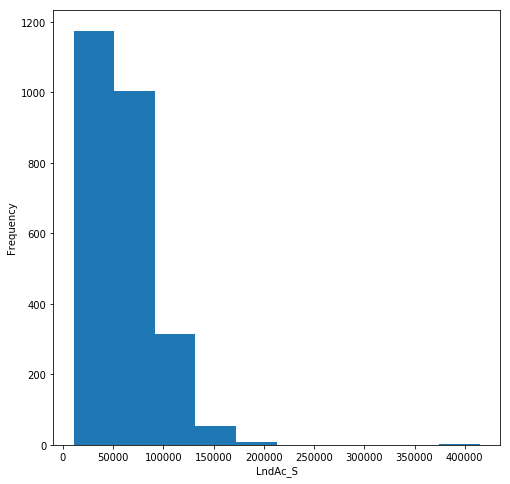

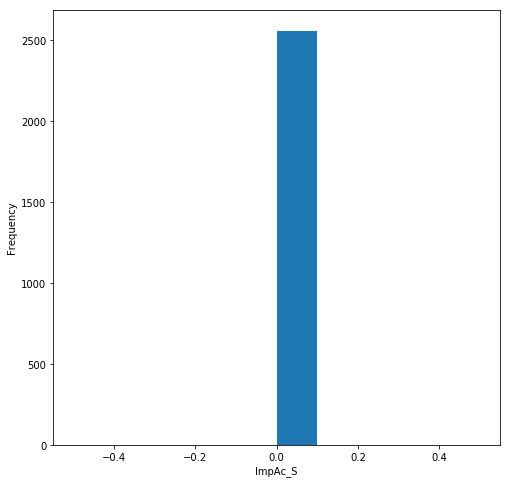

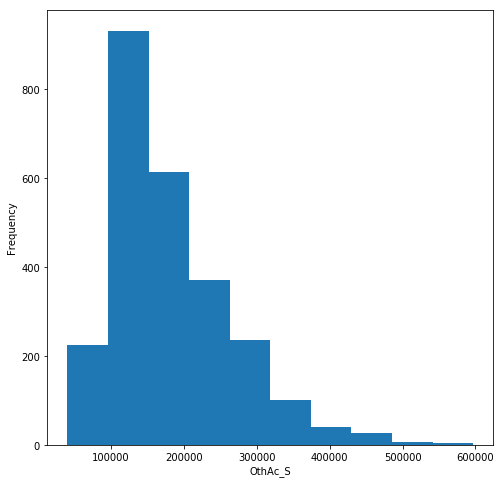

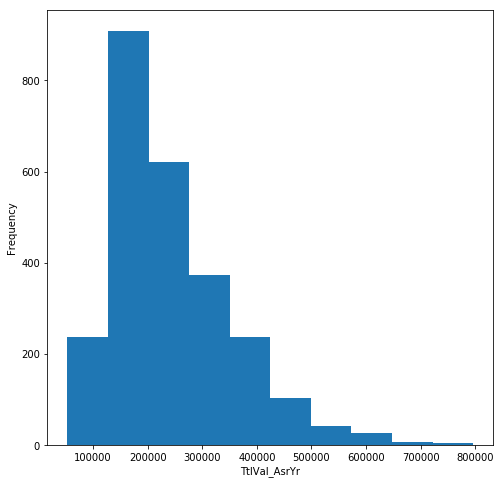

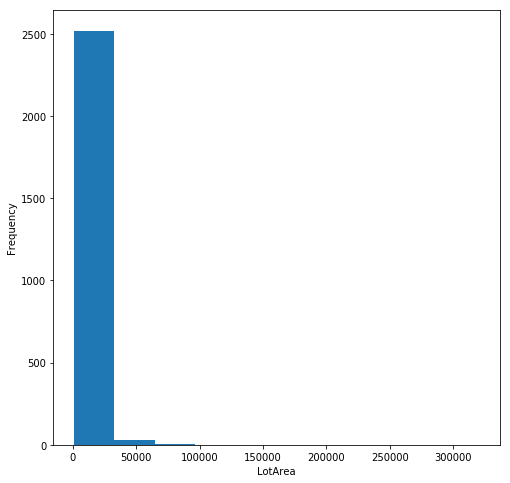

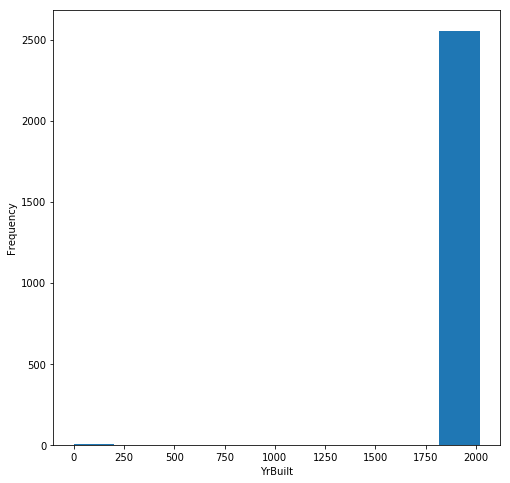

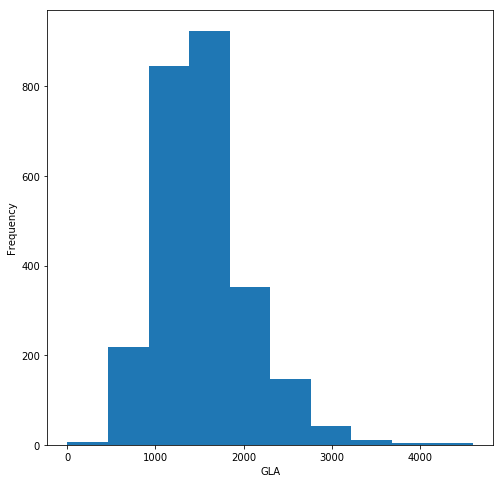

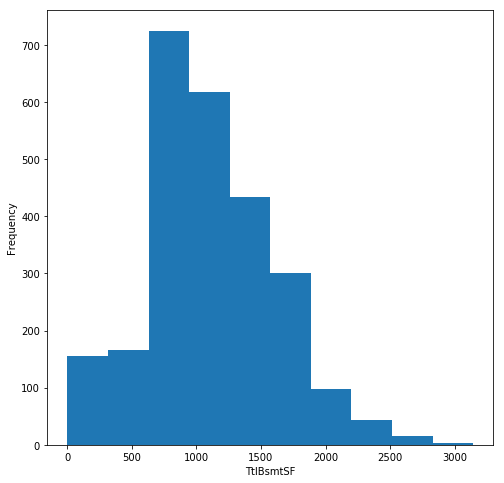

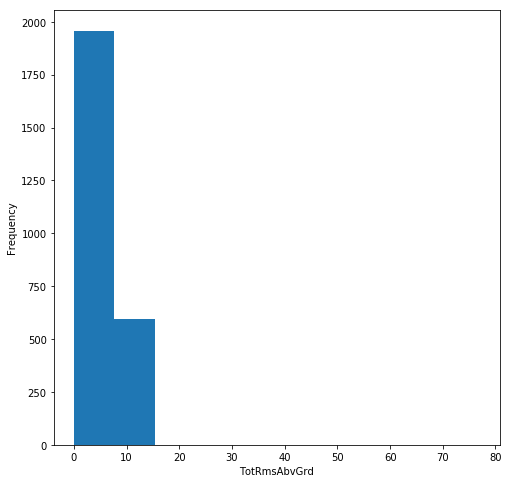

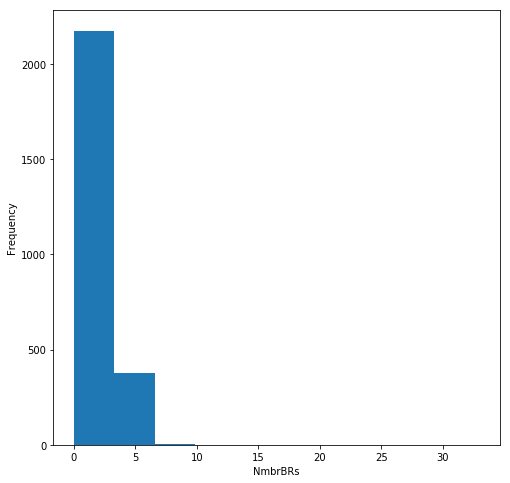

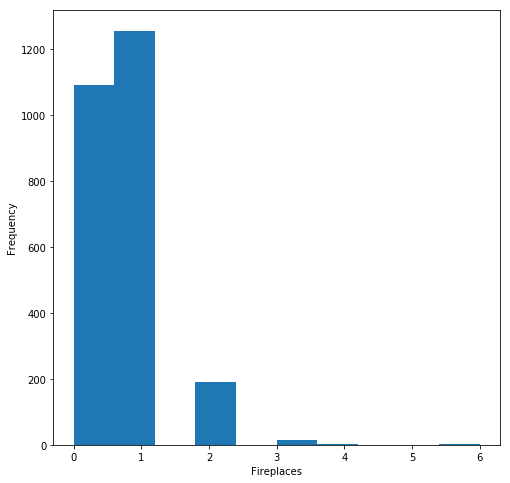

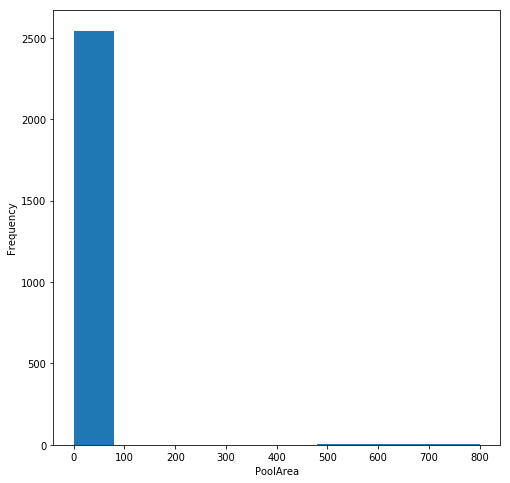

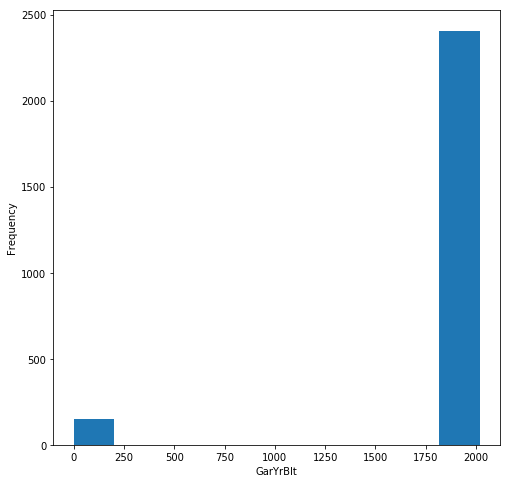

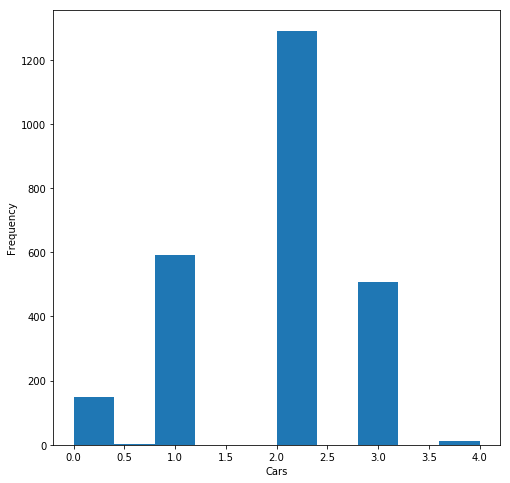

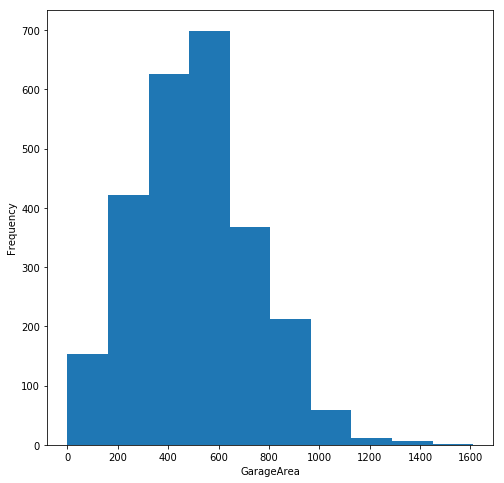

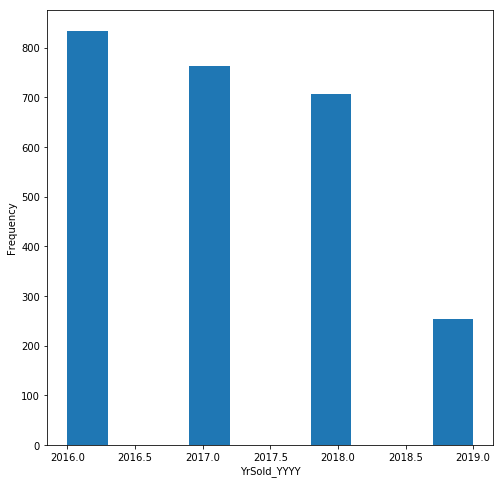

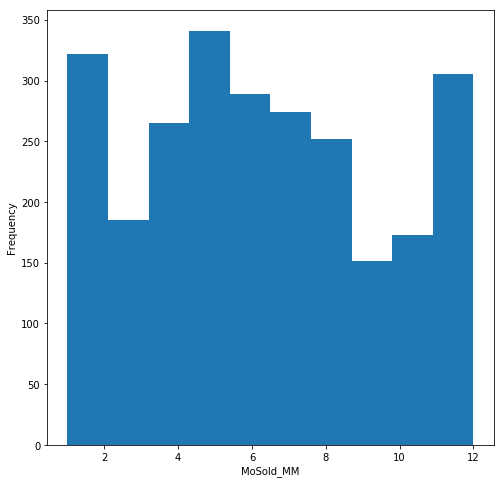

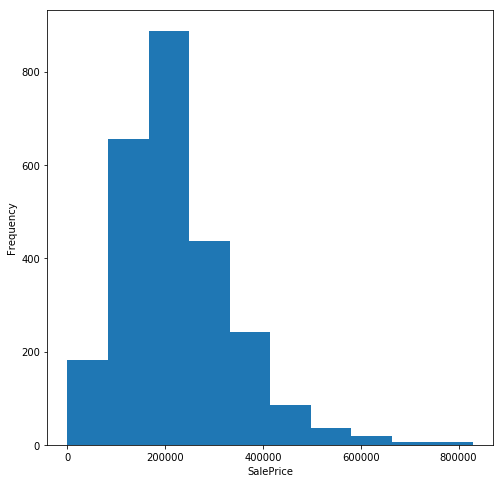

In [9]:
for element in num:
    plt.figure(figsize=(8,8))
    plt.hist(df[element])
    plt.xlabel(element)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
for element in num:
    print(f'{element}:{df[element].unique()}')

LndAc_S:[ 93300  98100  80000 107200 100600  74600  92200 153200  63300  78900
  78700  23800  56200  55900  55100  55600  87500 100500  95300  94500
 100800  55000  50900  54900  58000  79200  82100  54400  52800  82400
  75600 120100 105300 121800 123400 109400 112400 108600 137000 151500
 193300 155600 135700 114200 149800  94200 111100 107100  94700  88900
 122800 139400 131400 146700 136100 414700 115700 157600 157100 125500
  70600  71700  68900  77300  70700  82500  83900  85400  84100  68500
  68300  71600  81600  96300  68600  73700  67400  66900  64500  63000
  59500  69100  49800  56400  50700  55700  61100  59300  53600  55500
  45700  48600  57100  52400  56100  97900  92600  91800  64000  62500
  53900  56900  51700  45600  47700  66000  49500  51200  82800  89700
  86200  66500  62100  53800  58900  55300  77900  90700  66800  57800
  62800  72000  51800  53100  58500  56000  50500  58200  50400  51500
  65300  70500  65400  63100  59800  91400  59900  66400 128600 15680

In [11]:
df[df['TotRmsAbvGrd']==77]

,ClassSc_S,PA-Strt,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
1203,1-STORY 1946 & NEWER ALL STYLES,WILSON,59500,0,178500,238000,N Ames,8092.0,Dwg&Lot,2010.0,C'Block,CompShg,Wd Sdng,Wd Sdng,BrkFace,GasFWA,Yes,1182.0,1050.0,77.0,3.0,0.0,0.0,Attachd,1954.0,1.0,286.0,2018.0,9.0,224350.0,WRDConv,Normal


In [12]:
df.at[1203, 'TotRmsAbvGrd']=7.0

In [13]:
df.iloc[1203]

ClassSc_S       1-STORY 1946 & NEWER ALL STYLES
PA-Strt                                  WILSON
LndAc_S                                   59500
ImpAc_S                                       0
OthAc_S                                  178500
TtlVal_AsrYr                             238000
Neighborhood                             N Ames
LotArea                                    8092
ParType                                 Dwg&Lot
YrBuilt                                    2010
Foundation                              C'Block
RoofMatl                                CompShg
Ext1                                    Wd Sdng
Ext2                                    Wd Sdng
MasVnrType                              BrkFace
Heating                                  GasFWA
Central Air                                 Yes
GLA                                        1182
TtlBsmtSF                                  1050
TotRmsAbvGrd                                  7
NmbrBRs                                 

In [14]:
df[df['NmbrBRs']==33]

,ClassSc_S,PA-Strt,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
1314,1-1/2 STORY - UNFINISHED ALL AGES,STAFFORD,37700,0,112900,150600,N Ames,6390.0,Dwg&Lot,1954.0,C'Block,CompShg,MetalSd,MetalSd,None,GasFWA,Yes,1360.0,984.0,4.0,33.0,0.0,0.0,Detachd,1954.0,1.0,280.0,2016.0,5.0,178500.0,WRDConv,Normal


In [15]:
df.at[1314, 'NmbrBRs']=3.0

In [16]:
df.iloc[1314]

ClassSc_S       1-1/2 STORY - UNFINISHED ALL AGES
PA-Strt                                  STAFFORD
LndAc_S                                     37700
ImpAc_S                                         0
OthAc_S                                    112900
TtlVal_AsrYr                               150600
Neighborhood                               N Ames
LotArea                                      6390
ParType                                   Dwg&Lot
YrBuilt                                      1954
Foundation                                C'Block
RoofMatl                                  CompShg
Ext1                                      MetalSd
Ext2                                      MetalSd
MasVnrType                                   None
Heating                                    GasFWA
Central Air                                   Yes
GLA                                          1360
TtlBsmtSF                                     984
TotRmsAbvGrd                                    4


In [17]:
df.drop(['ImpAc_S'],axis=1,inplace=True)

In [18]:
df[df['YrBuilt']==0]

,ClassSc_S,PA-Strt,LndAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
4,1-STORY 1946 & NEWER ALL STYLES,AUDUBON,80000,57300,137300,HaydnLk,9189.0,Vac.Lot,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2018.0,7.0,80000.0,WRDConv,Normal
5,1-STORY 1946 & NEWER ALL STYLES,AUDUBON,80000,57300,137300,HaydnLk,9189.0,Vac.Lot,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2017.0,4.0,3999.0,WRDConv,Abnorml


In [19]:
df.drop([df.index[4],df.index[5]],inplace=True)

In [20]:
df.head()

,ClassSc_S,PA-Strt,LndAc_S,OthAc_S,TtlVal_AsrYr,Neighborhood,LotArea,ParType,YrBuilt,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,NmbrBRs,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond
0,2-STORY 1946 & NEWER,LEDGES,93300,279700,373000,HaydnLk,10015.0,Dwg&Lot,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2017.0,10.0,365400.0,WRDConv,Normal
1,2-STORY 1946 & NEWER,LEDGES,93300,279700,373000,HaydnLk,10015.0,Dwg&Lot,2016.0,C'Block,CompShg,VinylSd,VinylSd,BrkFace,GasFWA,Yes,2243.0,1142.0,9.0,4.0,1.0,0.0,Attachd,2016.0,3.0,647.0,2016.0,5.0,75000.0,WRDConv,Normal
2,2-STORY 1946 & NEWER,LEDGES,98100,294400,392500,HaydnLk,14904.0,Dwg&Lot,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2019.0,1.0,392500.0,WRDConv,Normal
3,2-STORY 1946 & NEWER,LEDGES,98100,294400,392500,HaydnLk,14904.0,Dwg&Lot,2018.0,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,2456.0,1604.0,8.0,4.0,1.0,0.0,Attachd,2018.0,3.0,744.0,2018.0,1.0,75000.0,WRDConv,Normal
6,1-STORY 1946 & NEWER ALL STYLES,LEOPOLD,107200,321600,428800,HaydnLk,13915.0,Dwg&Lot,2017.0,P'Conc,CompShg,CemntBd,CmentBd,Stone,GasFWA,Yes,1824.0,1824.0,7.0,2.0,1.0,0.0,Attachd,2017.0,3.0,1057.0,2018.0,6.0,502915.0,NewSold,Partial


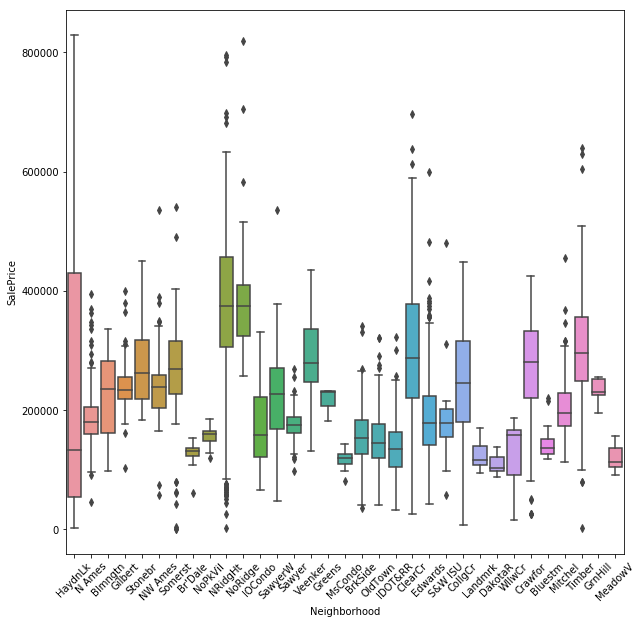

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.xticks(rotation=45)
plt.show()